In [70]:
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from IPython.display import display
from PIL import ImageEnhance

import os, random

In [9]:
import tensorflow as tf

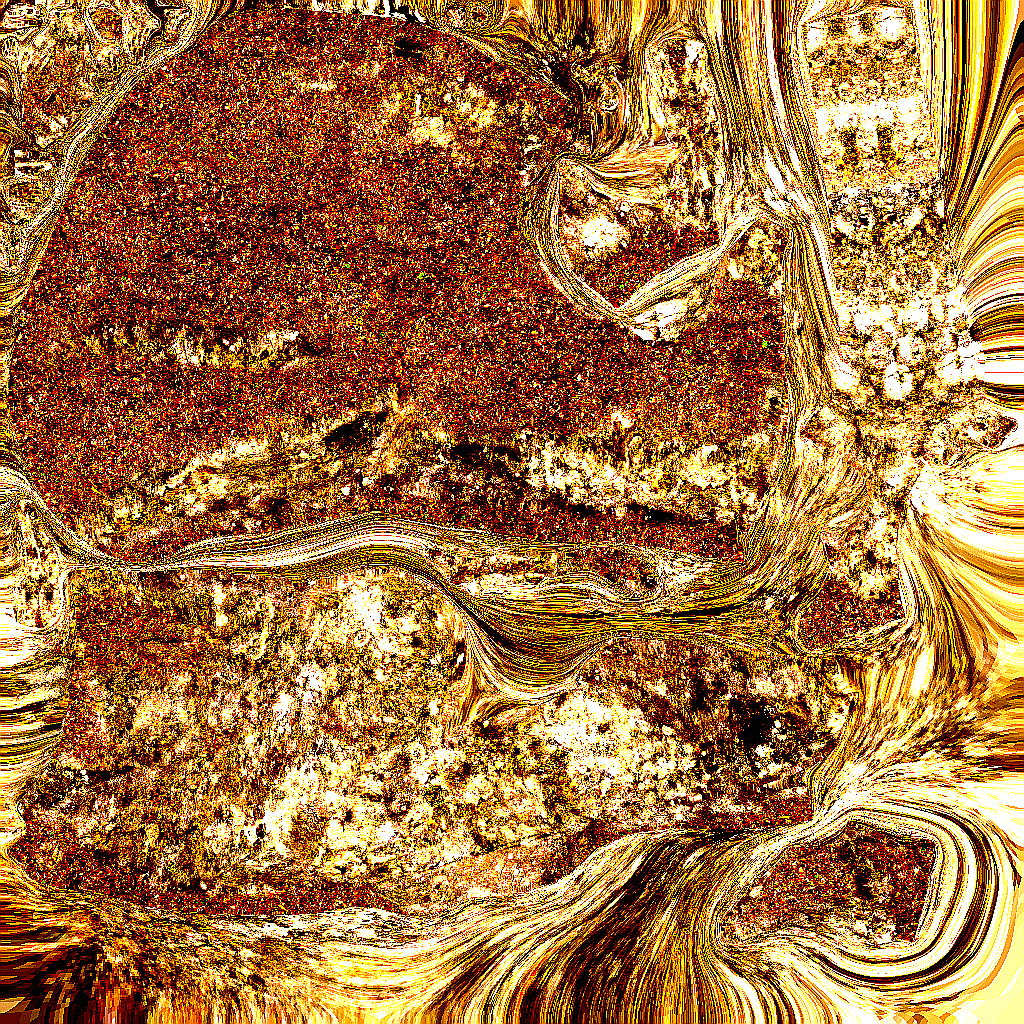

In [106]:
im = Image.open('data/Rock/Mesh_000000/_Shared/Mesh_000000_HD_BC.tga').convert('RGB')
im = ImageEnhance.Contrast(im).enhance(10)
im = ImageEnhance.Sharpness(im).enhance(5)

im = np.array(im)
#im[:,:,3] = 255 #fills in whitesapce
display(Image.fromarray(im))

In [107]:
lap_im = skimage.transform.pyramid_laplacian(np.array(im) / 255.0,downscale=2)
im_list = list(lap_im)

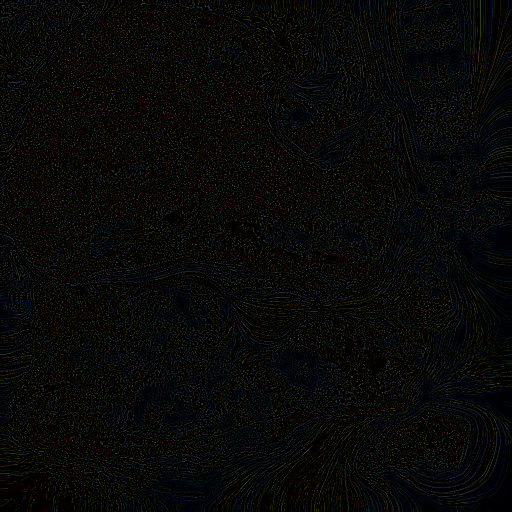

In [108]:
layer0 = im_list[1] * 255 
layer0[layer0 < 0] = 0
layer0 = layer0.astype(np.uint8)

Image.fromarray(layer0)

In [109]:
import cv2
import numpy as np,sys

In [110]:
img_lo = cv2.pyrDown(im)
G = img_lo.copy()
gpA = [G]
for i in range(2):
    G = cv2.pyrDown(G)
    gpA.append(G)
lpA = [gpA[1]]
for i in range(1,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)


In [111]:
LS = []
for la in lpA:
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,:]))
    LS.append(ls)
ls_ = LS[0]
for i in range(1,2):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

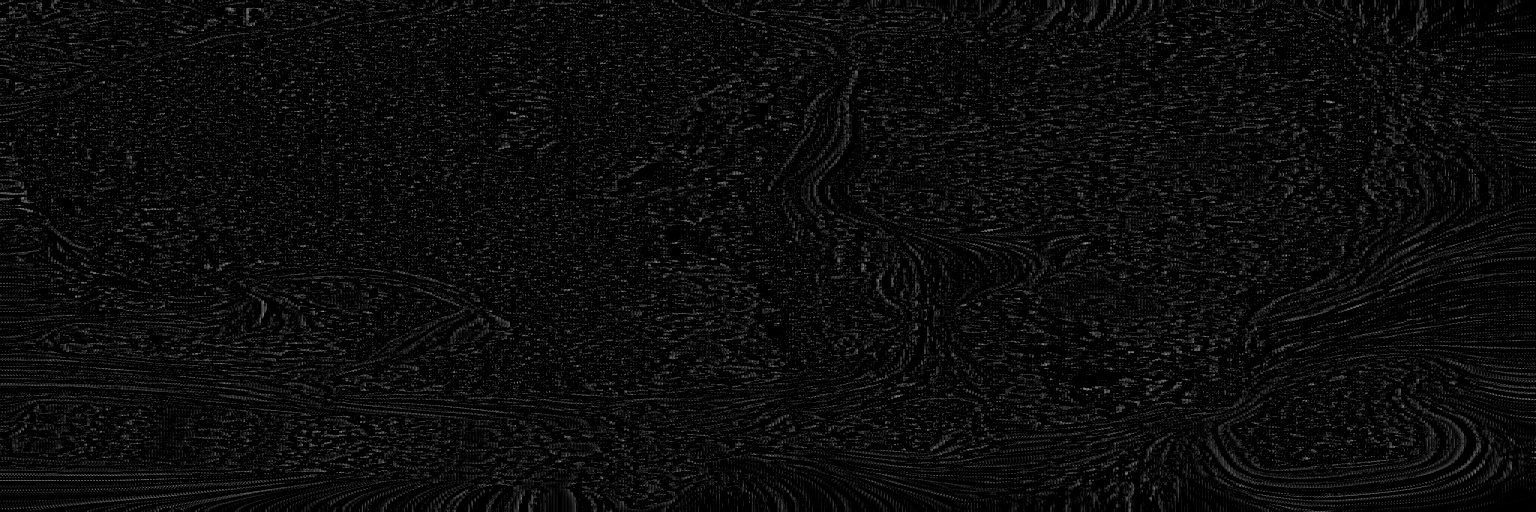

In [112]:
Image.fromarray(img_lo)
Image.fromarray(ls)

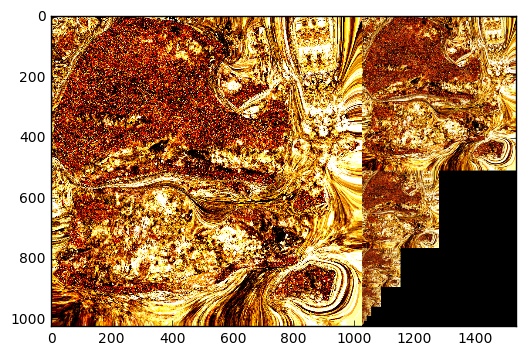

In [103]:
rows, cols, dim = np.array(im).shape

pyramid = tuple(skimage.transform.pyramid_gaussian(im, downscale=2))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()